In [118]:
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib.ticker
from matplotlib.patches import Rectangle
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize,LogNorm
from matplotlib.font_manager import FontProperties
import numpy as np
import astropy.io.ascii as at
import astropy.io.fits as fits
import astropy.table as table
from astropy.table import Table
import astropy.units as u
from astropy.coordinates import SkyCoord

In [5]:
age_norm = LogNorm(vmin=1,vmax=5_000)
mapper = cm.ScalarMappable(norm=age_norm, cmap=cm.plasma_r)

# A few definitions

In [6]:
poster_figure = (12,7)
talk_figure = (10,6.5)
single_figure = (8,8)
double_figure = (13,6)
double_stacked = (6,13)
triple_stacked = (6,14)
quad_square = (13,10)
proposal_figure = (10,5.5)

In [7]:
import matplotlib as mpl
mpl.rcParams['lines.markeredgewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams[''] = 


# mpl.rcParams['axes.prop_cycle'] = cycler('color',cmap_qual)

In [8]:
# cmap = plt.cm.viridis
# old_color = plt.cm.Greys(0.5)
# k2_color = "Crimson"

cmap = cm.plasma_r
old_color = plt.cm.Greys(0.4)


In [9]:
ecliptic = SkyCoord(np.linspace(0,360,1000),np.zeros(1000),unit=u.deg,frame="barycentrictrueecliptic")

# Show clusters in age-distance space

In [10]:
webda = at.read("webdaclusters.csv")
print(webda.dtype)
# NGC 2632 and Melotte 25

webda["Dist"][webda["Cluster_name"]=="Ruprecht 147"] = 300

webda_pos = SkyCoord(webda["RA"],webda["Dec"],unit=(u.hourangle,u.deg),frame="icrs")
# print(webda_pos)

[('Cluster_name', '<U15'), ('RA', '<U8'), ('Dec', '<U9'), ('l', '<f8'), ('b', '<f8'), ('Dist', '<i8'), ('Mod', '<f8'), ('EB-V', '<f8'), ('Age', '<f8'), ('ST', '<U2'), ('Z', '<f8'), ('Diam', '<f8'), ('Fe/H', '<f8'), ('MRV', '<f8'), ('pm RA', '<f8'), ('pm Dec', '<f8'), ('Measures', '<i8'), ('Stars', '<i8')]


In [11]:
khar0 = at.read("kharchenko2013_clusters.csv",delimiter=",",data_start=1,header_start=0)
# NGC_2632, Hyades isn't in there (too close to appear as an overdensity)
print(khar0.dtype)

ocs = khar0["Type"].mask.nonzero()[0]
print(ocs)
khar0 = khar0[ocs]

khar_z0 = np.sin(khar0["GLAT"] * np.pi / 180) * khar0["d"]
# print(khar_z)

khar_pos0 = SkyCoord(khar0["RAJ2000"],khar0["DEJ2000"],unit=u.deg,frame="icrs")

res = khar_pos0.match_to_catalog_sky(webda_pos)

[('MWSC', '<i8'), ('Name', '<U17'), ('Type', '<U7'), ('n_Type', '<U1'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('GLON', '<f8'), ('GLAT', '<f8'), ('r0', '<f8'), ('r1', '<f8'), ('r2', '<f8'), ('pmRA', '<f8'), ('pmDE', '<f8'), ('RV', '<f8'), ('e_RV', '<f8'), ('o_RV', '<i8'), ('N1sr0', '<i8'), ('N1sr1', '<i8'), ('N1sr2', '<i8'), ('d', '<i8'), ('E(B-V)', '<f8'), ('MOD', '<f8'), ('E(J-Ks)', '<f8'), ('E(J-H)', '<f8'), ('dH', '<f8'), ('logt', '<f8'), ('e_logt', '<f8'), ('Nt', '<i8'), ('SType', '<U3'), ('[Fe/H]', '<U6'), ('e_[Fe/H]', '<f8'), ('o_[Fe/H]', '<i8'), ('Simbad', '<U6'), ('col33', '<U6')]
[   0    1    2 ... 3003 3004 3005]


In [12]:
print(res)
sep2d = np.asarray(res[1].value)*res[1].unit
print(sep2d)
print(res[0],res[0][0])

(array([2, 4, 3, ..., 3, 2, 0]), <Angle [2.06431023, 5.77318436, 1.37988289, ..., 2.10876175, 2.34326497,
        1.31806016] deg>, <Quantity [0.03602706, 0.10071846, 0.02408292, ..., 0.03680276, 0.04089484,
           0.02300398]>)
[2.06431023 5.77318436 1.37988289 ... 2.10876175 2.34326497 1.31806016] deg
[2 4 3 ... 3 2 0] 2


In [13]:
names_match = np.zeros(len(khar0),bool)
for i,j in enumerate(res[0]):
    if khar0["Name"][i]==webda["Cluster_name"][j].replace(" ","_"):
        names_match[i] = True
print(max(sep2d[names_match]),len(np.where(names_match)[0]))

0.7967439175373021 deg 518


(array([518.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <BarContainer object of 14 artists>)

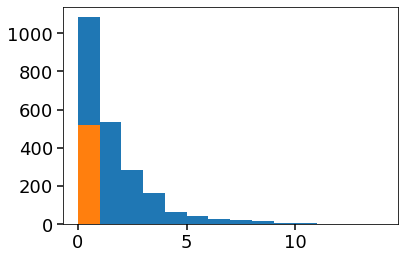

In [15]:
plt.hist(sep2d.to(u.deg).value,bins=np.arange(15))
plt.hist(sep2d[names_match].to(u.deg).value,bins=np.arange(15))

In [16]:
new_khar = sep2d > (0.8*u.deg)
khar = khar0[new_khar]
khar_z = khar_z0[new_khar]
khar_pos = khar_pos0[new_khar]

In [17]:
schm = at.read("schmeja2014_clusters.csv",delimiter=",",data_start=1,header_start=0)
print(schm.dtype)

schm_z = np.sin(schm["GLAT"] * np.pi / 180) * schm["d"]
schm_pos = SkyCoord(schm["RAJ2000"],schm["DEJ2000"],unit=u.deg,frame="icrs")

# All Schm clusters are >2 degrees from any Webda clusters

[('MWSC', '<i8'), ('N', '<i8'), ('Name', '<U9'), ('Type', '<U1'), ('n_Type', '<U1'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('GLON', '<f8'), ('GLAT', '<f8'), ('r0', '<f8'), ('r1', '<f8'), ('r2', '<f8'), ('pmRA', '<f8'), ('pmDE', '<f8'), ('N1sr0', '<i8'), ('N1sr1', '<i8'), ('N1sr2', '<i8'), ('d', '<i8'), ('E(B-V)', '<f8'), ('MOD', '<f8'), ('E(J-Ks)', '<f8'), ('E(J-H)', '<f8'), ('deltaH', '<f8'), ('logt', '<f8'), ('e_logt', '<f8'), ('Nt', '<i8')]


In [105]:
cat = Table(names=('Name', 'Catalog_Name', 'Catalog', 'Age'), dtype=('U25', 'U25', 'U25', 'f8'))
# print(cat)
cat.add_row(["Praesepe","NGC 2632","webda",790])
cat.add_row(["Hyades","Melotte 25","webda",850])
cat.add_row(["IC 2391","IC 2391","webda",40])
cat.add_row(["IC 2602","IC 2602","webda",40])
cat.add_row(["alpha Per","Melotte 20","webda",70])
cat.add_row(["Pleiades","Melotte 22","webda",125])
cat.add_row(["M34","NGC 1039","webda",200])
cat.add_row(["NGC 3532","NGC 3532","webda",300])
cat.add_row(["Coma Ber","Melotte 111","webda",500])
cat.add_row(["M37","NGC 2099","webda",550])
cat.add_row(["ONC","NGC 1976","webda",2])
cat.add_row(["NGC 2264","NGC 2264","webda",2])
cat.add_row(["NGC 2362","NGC 2362","webda",5])
cat.add_row(["NGC 2547","NGC 2547","webda",40])
cat.add_row(["NGC 2516","NGC 2516","webda",150])
cat.add_row(["NGC 2451A","NGC 2451A","webda",40])
cat.add_row(["Blanco 1","Blanco 1","webda",150])
cat.add_row(["M35","NGC 2168","webda",150])
# cat.add_row(["NGC 6530","NGC 6530","webda",2])
cat.add_row(["h Per","NGC_869","khar0",13])
cat.add_row(["IC 4665","IC 4665","webda",40])
cat.add_row(["NGC_6811","NGC_6811","khar",1e3])
cat.add_row(["NGC_6819","NGC_6819","khar",2.5e3])
cat.add_row(["Ruprecht 147","Ruprecht 147","webda",2.5e3])
cat.add_row(["NGC 6791","NGC 6791","webda",8e3])
# cat.add_row(["","","webda",])
# cat.add_row(["","","webda",])


In [104]:
name = "NGC 6791"
print(webda[webda["Cluster_name"]==name.replace("_"," ")])
print(khar[khar["Name"]==name.replace(" ","_")])
print(khar0[khar0["Name"]==name.replace(" ","_")])

Cluster_name    RA       Dec      l      b    ... pm RA pm Dec Measures Stars
------------ -------- --------- ------ ------ ... ----- ------ -------- -----
    NGC 6791 19 20 53 +37 46 18 69.959 10.904 ... -3.17  -7.74       54    54
MWSC Name Type n_Type RAJ2000 DEJ2000 ... [Fe/H] e_[Fe/H] o_[Fe/H] Simbad col33
---- ---- ---- ------ ------- ------- ... ------ -------- -------- ------ -----
MWSC   Name   Type n_Type RAJ2000 ... [Fe/H] e_[Fe/H] o_[Fe/H] Simbad col33
---- -------- ---- ------ ------- ... ------ -------- -------- ------ -----
3088 NGC_6791   --     --  290.22 ...   0.32     0.02       24 Simbad    --


In [57]:
# webda[(webda["Dist"]<200) & (webda["Age"]<7.2)]

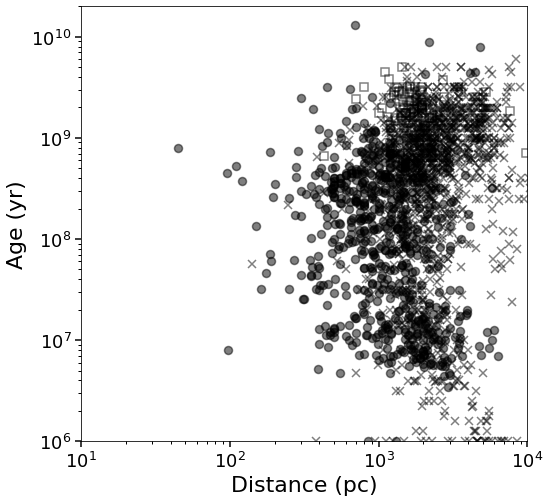

In [58]:
plt.figure(figsize=single_figure)
ax = plt.subplot(111)

ax.plot(khar["d"],10**khar["logt"],'x',alpha=0.5,color="k")
ax.plot(schm["d"],10**schm["logt"],'s',mfc="none",alpha=0.5,color="k")
ax.plot(webda["Dist"],10**webda["Age"],'o',alpha=0.5,color="k")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(10,1e4)
ax.set_ylim(1e6,2e10)

ax.set_xlabel("Distance (pc)")
ax.set_ylabel("Age (yr)")

plt.savefig("all_clusters_age_dist.png",bbox_inches="tight",dpi=300)

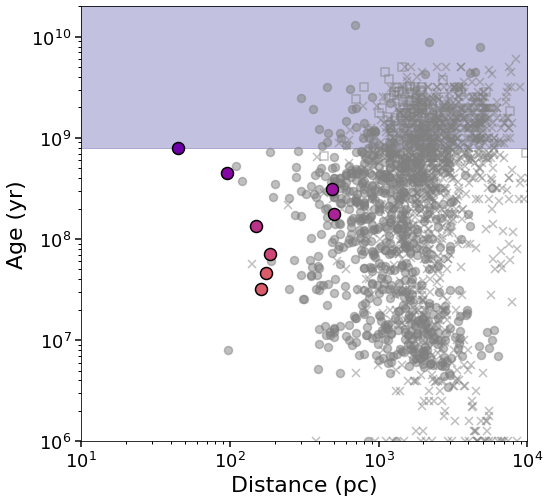

In [125]:
plt.figure(figsize=single_figure)
ax = plt.subplot(111)

ax.plot(khar["d"],10**khar["logt"],'x',alpha=0.5,color="grey")
ax.plot(schm["d"],10**schm["logt"],'s',mfc="none",alpha=0.5,color="grey")
ax.plot(webda["Dist"],10**webda["Age"],'o',alpha=0.5,color="grey")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(10,1e4)
ax.set_ylim(1e6,2e10)

ax.set_xlabel("Distance (pc)")
ax.set_ylabel("Age (yr)")


# for row in cat:
for cluster in ["IC 2391","IC 2602","alpha Per","Pleiades",
               "M34","NGC 3532","Coma Ber","Hyades"]:
    row = cat[cat["Name"]==cluster]
    if row["Catalog"]=="webda":
        loc = webda["Cluster_name"]==row["Catalog_Name"]
        pcolor = mapper.to_rgba(row["Age"][0])
        ax.plot(webda["Dist"][loc],10**webda["Age"][loc],'o',
                color=pcolor,mec="k",ms=12)
#         ax.text(webda["Dist"][loc]*0.9,10**webda["Age"][loc],
#                 str(row["Name"][0]),color=pcolor,
#                 horizontalalignment="right",fontsize=18)

plt.savefig("all_clusters_age_dist_barnes2003.png",bbox_inches="tight",dpi=300)

field = Rectangle((10,8e8),width=1e4-10,height=ax.get_ylim()[1]-8e8,
                  color=mapper.to_rgba(5000),alpha=0.25)
ax.add_patch(field)
plt.savefig("all_clusters_age_dist_barnes2003field.png",bbox_inches="tight",dpi=300)

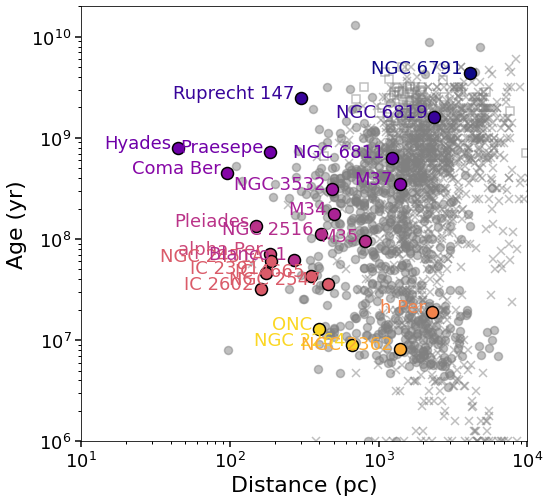

In [116]:
plt.figure(figsize=single_figure)
ax = plt.subplot(111)

ax.plot(khar["d"],10**khar["logt"],'x',alpha=0.5,color="grey")
ax.plot(schm["d"],10**schm["logt"],'s',mfc="none",alpha=0.5,color="grey")
ax.plot(webda["Dist"],10**webda["Age"],'o',alpha=0.5,color="grey")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(10,1e4)
ax.set_ylim(1e6,2e10)

ax.set_xlabel("Distance (pc)")
ax.set_ylabel("Age (yr)")


for row in cat:
#     row = cat[cat["Name"]==cluster]
    pcolor = color=mapper.to_rgba(row["Age"])
    if row["Catalog"]=="webda":
        loc = webda["Cluster_name"]==row["Catalog_Name"]
        ax.plot(webda["Dist"][loc],10**webda["Age"][loc],'o',
                color=pcolor,mec="k",ms=12)
        ax.text(webda["Dist"][loc]*0.9,10**webda["Age"][loc],
                str(row["Name"]),color=pcolor,
                horizontalalignment="right",fontsize=18)
    elif (row["Catalog"]=="khar") | (row["Catalog"]=="khar0"):
        loc = khar0["Name"]==row["Catalog_Name"]
        ax.plot(khar0["d"][loc],10**khar0["logt"][loc],'o',
                color=pcolor,mec="k",ms=12)
        ax.text(khar0["d"][loc]*0.9,10**khar0["logt"][loc],
                str(row["Name"]).replace("_"," "),color=pcolor,
                horizontalalignment="right",fontsize=18)

# plt.savefig("all_clusters_age_dist_barnes2003.png",bbox_inches="tight",dpi=300)

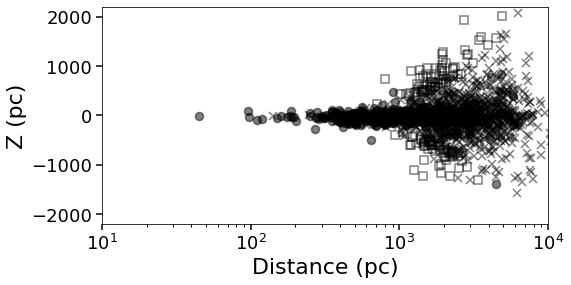

In [126]:
plt.figure(figsize=(8,4))
ax2 = plt.subplot(111)

ax2.plot(khar["d"],khar_z,'kx',alpha=0.5)
ax2.plot(webda["Dist"],webda["Z"],'ko',alpha=0.5)
ax2.plot(schm["d"],schm_z,'ks',mfc="none",alpha=0.5)

ax2.set_xscale("log")
ax2.set_xlim(10,1e4)
ax2.set_ylim(-2.2e3,2.2e3)

ax2.set_xlabel("Distance (pc)")
ax2.set_ylabel("Z (pc)")

plt.savefig("all_clusters_age_Z.png",bbox_inches="tight",dpi=300)
            
# ax2.plot(webda["Dist"][webda["Cluster_name"]=="NGC 2632"],webda["Z"][webda["Cluster_name"]=="NGC 2632"],
#         'o',mfc="C0",mec="C0",ms=12)
# ax2.plot(webda["Dist"][webda["Cluster_name"]=="Melotte 25"],webda["Z"][webda["Cluster_name"]=="Melotte 25"],
#         'o',mfc="C0",mec="C0",ms=12)
# ax2.plot(webda["Dist"][webda["Cluster_name"]=="Ruprecht 147"],webda["Z"][webda["Cluster_name"]=="Ruprecht 147"],
#         'o',mfc="C2",mec="C2",ms=12)

# ax2.text(hya[0]*1.2,300,"Hyades",color="C0",horizontalalignment="right",fontsize=18)
# ax2.text(prae[0]*1.2,-500,"Praesepe",color="C0",horizontalalignment="right",fontsize=18)


# # ax.text(hya[0],hya[1]*0.55,"Hyades",color="b",horizontalalignment="center",fontsize=18)
# # ax.text(prae[0],prae[1]*1.4,"Praesepe",color="b",horizontalalignment="center",fontsize=18)


# plt.savefig("all_clusters_age_Z_hypra.png",bbox_inches="tight",dpi=300)


In [127]:
print(webda["Stars"][np.argmin(webda["Dist"])])

594


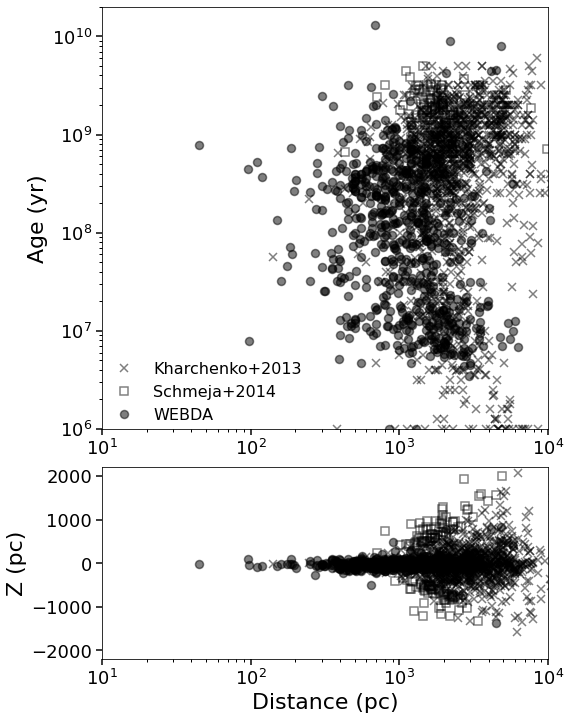

In [128]:
plt.figure(figsize=(8,12))
ax1 = plt.subplot2grid((3,1),(0,0),rowspan=2)

ax1.plot(khar["d"],10**khar["logt"],'kx',alpha=0.5,label="Kharchenko+2013")
ax1.plot(schm["d"],10**schm["logt"],'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax1.plot(webda["Dist"],10**webda["Age"],'ko',label="WEBDA",alpha=0.5)

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.set_xlim(10,1e4)
ax1.set_ylim(1e6,2e10)

# ax1.set_xlabel("Distance (pc)")
ax1.set_ylabel("Age (yr)")

ax1.legend(loc=3,borderaxespad=0)

ax2 = plt.subplot2grid((3,1),(2,0),rowspan=1)

ax2.plot(khar["d"],khar_z,'kx',alpha=0.5)
ax2.plot(webda["Dist"],webda["Z"],'ko',alpha=0.5)
ax2.plot(schm["d"],schm_z,'ks',mfc="none",alpha=0.5)

ax2.set_xscale("log")
ax2.set_xlim(10,1e4)
ax2.set_ylim(-2.2e3,2.2e3)

ax2.set_xlabel("Distance (pc)")
ax2.set_ylabel("Z (pc)")

plt.savefig("all_clusters.pdf",bbox_inches="tight")
plt.savefig("all_clusters.png",bbox_inches="tight")

Text(0,0.5,'b (deg)')

/Users/sdouglas/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


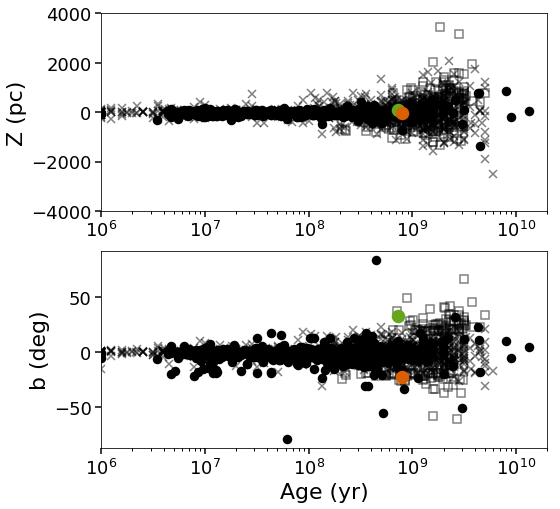

In [20]:
plt.figure(figsize=single_figure)
ax1 = plt.subplot(211)

ax1.plot(10**khar["logt"],khar_z,'kx',alpha=0.5)
ax1.plot(10**webda["Age"],webda["Z"],'ko')
ax1.plot(10**schm["logt"],schm_z,'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax1.plot(10**webda["Age"][webda["Cluster_name"]=="NGC 2632"],webda["Z"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)
ax1.plot(10**webda["Age"][webda["Cluster_name"]=="Melotte 25"],webda["Z"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)

ax1.set_xscale("log")
ax1.set_xlim(1e6,2e10)
ax1.set_ylim(-4e3,4e3)

# ax1.set_xlabel("Distance (pc)")
ax1.set_ylabel("Z (pc)")


ax2 = plt.subplot(212)

ax2.plot(10**khar["logt"],khar["GLAT"],'kx',alpha=0.5)
ax2.plot(10**schm["logt"],schm["GLAT"],'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax2.plot(10**webda["Age"],webda["b"],'ko')
ax2.plot(10**webda["Age"][webda["Cluster_name"]=="NGC 2632"],webda["b"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)
ax2.plot(10**webda["Age"][webda["Cluster_name"]=="Melotte 25"],webda["b"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)

ax2.set_xscale("log")
# ax.set_yscale("log")

ax2.set_xlim(1e6,2e10)

ax2.set_xlabel("Age (yr)")
ax2.set_ylabel("b (deg)")



Text(0,0.5,'b (deg)')

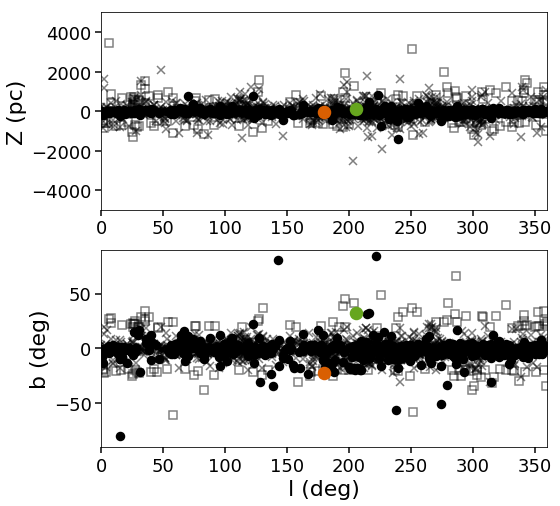

In [21]:
plt.figure(figsize=single_figure)
ax1 = plt.subplot(211)

ax1.plot(khar["GLON"],khar_z,'kx',alpha=0.5)
ax1.plot(webda["l"],webda["Z"],'ko')
ax1.plot(schm["GLON"],schm_z,'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax1.plot(webda["l"][webda["Cluster_name"]=="NGC 2632"],webda["Z"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)
ax1.plot(webda["l"][webda["Cluster_name"]=="Melotte 25"],webda["Z"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)

# ax1.set_xscale("log")
ax1.set_xlim(0,360)
ax1.set_ylim(-5e3,5e3)

# ax1.set_xlabel("Distance (pc)")
ax1.set_ylabel("Z (pc)")


ax2 = plt.subplot(212,sharex=ax1)

ax2.plot(khar["GLON"],khar["GLAT"],'kx',alpha=0.5)
ax2.plot(schm["GLON"],schm["GLAT"],'ks',mfc="none",alpha=0.5,label="Schmeja+2014")
ax2.plot(webda["l"],webda["b"],'ko')
ax2.plot(webda["l"][webda["Cluster_name"]=="NGC 2632"],webda["b"][webda["Cluster_name"]=="NGC 2632"],
        'o',mfc=cmap_qual[4],mec=cmap_qual[4],ms=12)
ax2.plot(webda["l"][webda["Cluster_name"]=="Melotte 25"],webda["b"][webda["Cluster_name"]=="Melotte 25"],
        'o',mfc=cmap_qual[1],mec=cmap_qual[1],ms=12)

# ax2.set_xscale("log")
# ax.set_yscale("log")

ax2.set_ylim(-90,90)
ax2.set_xlim(0,360)

ax2.set_xlabel("l (deg)")
ax2.set_ylabel("b (deg)")



In [158]:
def base_equatorial_map(color="k"):
    plt.figure(figsize=(10,8))
    ax2 = plt.subplot(111, projection="aitoff")

    ax2.plot(khar_pos.ra.wrap_at(180 * u.deg).radian,khar_pos.dec.radian,'x',color=color,alpha=0.5,label="Kharchenko+2013")
    ax2.plot(schm_pos.ra.wrap_at(180 * u.deg).radian,schm_pos.dec.radian,'s',color=color,mfc="none",alpha=0.5,label="Schmeja+2014")
    ax2.plot(webda_pos.ra.wrap_at(180 * u.deg).radian,webda_pos.dec.radian,'o',color=color,alpha=0.5,label="WEBDA")

    ax2.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax2.grid(True)


    ecliptic_ra = ecliptic.icrs.ra.wrap_at(180 * u.deg).radian
    ecliptic_dec = ecliptic.icrs.dec.radian
    new_ecl = np.argsort(ecliptic_ra)
    ecliptic_ra = ecliptic_ra[new_ecl]
    ecliptic_dec = ecliptic_dec[new_ecl]

    ax2.plot(ecliptic_ra,ecliptic_dec,'-',color="C6",lw=2,zorder=-1)

    return ax2

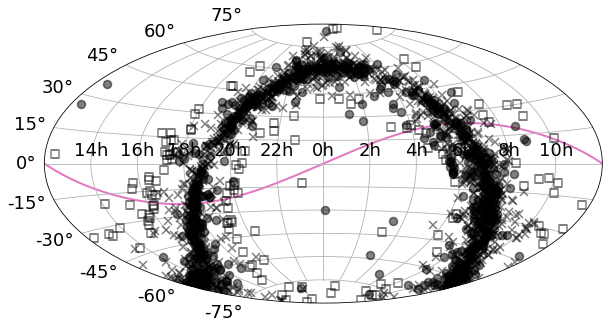

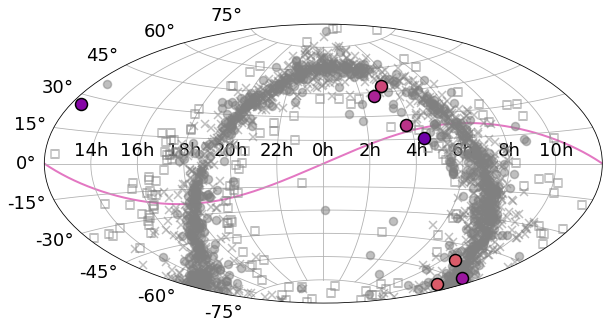

In [159]:
_ = base_equatorial_map("k")
plt.savefig("all_clusters_equatorial.png",bbox_inches="tight")

ax2 = base_equatorial_map("grey")

for cluster in ["IC 2391","IC 2602","alpha Per","Pleiades",
               "M34","NGC 3532","Coma Ber","Hyades"]:
    i = np.where(cat["Name"]==cluster)[0]
    pcolor = mapper.to_rgba(cat["Age"][i][0])
    if cat["Catalog"][i]=="webda":
        loc = webda["Cluster_name"]==cat["Catalog_Name"][i]
        ax2.plot(webda_pos[loc].ra.wrap_at(180 * u.deg).radian,
                 webda_pos[loc].dec.radian,'o',
                 color=pcolor,mec="k",ms=12)
#         ax2.text(webda_pos[loc].ra.wrap_at(180 * u.deg).radian*0.9,
#                  webda_pos[loc].dec.radian,
#                  cluster,color=pcolor,
#                  horizontalalignment="right",fontsize=18)
    elif (cat["Catalog"][i]=="khar") | (cat["Catalog"][i]=="khar0"):
        loc = khar0["Name"]==cat["Catalog_Name"][i]
        ax2.plot(khar_pos0[loc].ra.wrap_at(180 * u.deg).radian,
                 khar_pos0[loc].dec.radian,'o',
                 color=pcolor,mec="k",ms=12)
#         ax2.text(khar_pos0[loc].ra.wrap_at(180 * u.deg).radian*0.9,
#                  khar_pos0[loc].dec.radian,
#                  cluster,color=pcolor,
#                  horizontalalignment="right",fontsize=18)

# ax2.legend()

plt.savefig("all_clusters_equatorial_barnes2003.png",bbox_inches="tight")


In [179]:
def base_galactic_map(color="k"):
    plt.figure(figsize=(10,8))
    ax2 = plt.subplot(111, projection="aitoff")

    ax2.plot(khar_pos.galactic.l.wrap_at(180 * u.deg).radian,khar_pos.galactic.b.radian,
             'x',color=color,alpha=0.5,label="Kharchenko+2013")
    ax2.plot(schm_pos.galactic.l.wrap_at(180 * u.deg).radian,schm_pos.galactic.b.radian,
             's',color=color,mfc="none",alpha=0.5,label="Schmeja+2014")
    ax2.plot(webda_pos.galactic.l.wrap_at(180 * u.deg).radian,webda_pos.galactic.b.radian,
             'o',color=color,alpha=0.5,label="WEBDA")

#     ax2.set_xticklabels([])
#     ax2.set_yticklabels([])
#     ax2.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    xtl = [f"{d:.0f}"+r"$^\circ$" for d in np.arange(0,360,30)]
    ax2.set_xticklabels(np.append(xtl[-5:],xtl[:6]))
    ax2.grid(True)


    ecliptic_l = ecliptic.galactic.l.wrap_at(180 * u.deg).radian
    ecliptic_b = ecliptic.galactic.b.radian
    new_ecl = np.argsort(ecliptic_l)
    ecliptic_l = ecliptic_l[new_ecl]
    ecliptic_b = ecliptic_b[new_ecl]

    ax2.plot(ecliptic_l,ecliptic_b,'-',color="C6",lw=2,zorder=-1)

    # ax2.legend()

    return ax2

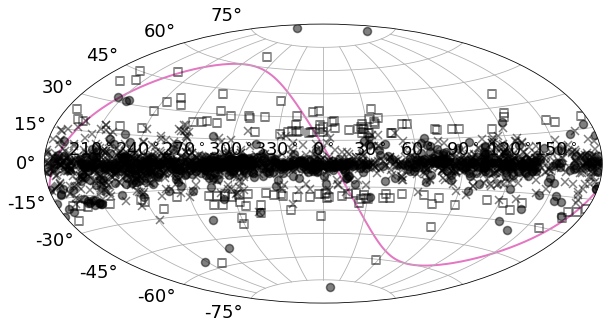

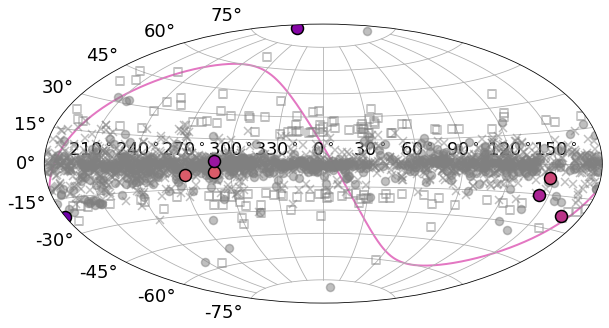

In [180]:
_ = base_galactic_map("k")
plt.savefig("all_clusters_galactic.png",bbox_inches="tight")

ax2 = base_galactic_map("grey")


for cluster in ["IC 2391","IC 2602","alpha Per","Pleiades",
               "M34","NGC 3532","Coma Ber","Hyades"]:
    i = np.where(cat["Name"]==cluster)[0]
    pcolor = mapper.to_rgba(cat["Age"][i][0])
    if cat["Catalog"][i]=="webda":
        loc = webda["Cluster_name"]==cat["Catalog_Name"][i]
        ax2.plot(webda_pos[loc].galactic.l.wrap_at(180 * u.deg).radian,
                 webda_pos[loc].galactic.b.radian,'o',
                 color=pcolor,mec="k",ms=12)
#         ax2.text(webda_pos[loc].ra.wrap_at(180 * u.deg).radian*0.9,
#                  webda_pos[loc].dec.radian,
#                  cluster,color=pcolor,
#                  horizontalalignment="right",fontsize=18)
    elif (cat["Catalog"][i]=="khar") | (cat["Catalog"][i]=="khar0"):
        loc = khar0["Name"]==cat["Catalog_Name"][i]
        ax2.plot(khar_pos0[loc].galactic.l.wrap_at(180 * u.deg).radian,
                 khar_pos0[loc].galactic.b.radian,'o',
                 color=pcolor,mec="k",ms=12)
#         ax2.text(khar_pos0[loc].ra.wrap_at(180 * u.deg).radian*0.9,
#                  khar_pos0[loc].dec.radian,
#                  cluster,color=pcolor,
#                  horizontalalignment="right",fontsize=18)

# ax2.legend()

plt.savefig("all_clusters_galactic_barnes2003.png",bbox_inches="tight")


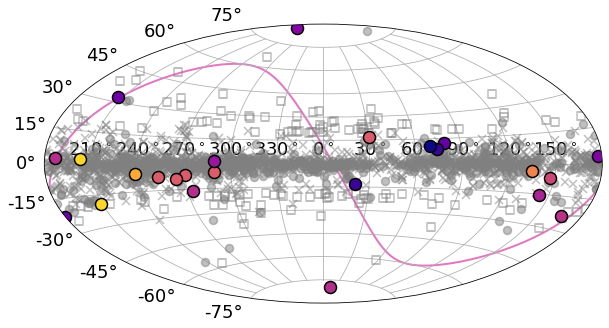

In [181]:
ax2 = base_galactic_map("grey")

for i,cluster in enumerate(cat["Name"]):
    pcolor = mapper.to_rgba(cat["Age"][i])
    if cat["Catalog"][i]=="webda":
        loc = webda["Cluster_name"]==cat["Catalog_Name"][i]
        ax2.plot(webda_pos[loc].galactic.l.wrap_at(180 * u.deg).radian,
                 webda_pos[loc].galactic.b.radian,'o',
                 color=pcolor,mec="k",ms=12)
#         ax2.text(webda_pos[loc].galactic.l.wrap_at(180 * u.deg).radian,
#                  webda_pos[loc].galactic.b.radian,
#                  cluster,color=pcolor,fontsize=18,
#                  horizontalalignment="right")
    elif (cat["Catalog"][i]=="khar") | (cat["Catalog"][i]=="khar0"):
        loc = khar0["Name"]==cat["Catalog_Name"][i]
        ax2.plot(khar_pos0[loc].galactic.l.wrap_at(180 * u.deg).radian,
                 khar_pos0[loc].galactic.b.radian,'o',
                 color=pcolor,mec="k",ms=12)
#         ax2.text(khar_pos0[loc].galactic.l.wrap_at(180 * u.deg).radian,
#                  khar_pos0[loc].galactic.b.radian,
#                  cluster,color=pcolor,fontsize=18,
#                  horizontalalignment="right")

# ax2.legend()

# plt.savefig("all_clusters_galactic_barnes2003.png",bbox_inches="tight")